Accuracy: 0.7115384615384616
Precision: 0.6666666666666666
Recall: 0.8461538461538461
F1 Score: 0.7457627118644068

Confusion Matrix:
[[15 11]
 [ 4 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        26
           1       0.67      0.85      0.75        26

    accuracy                           0.71        52
   macro avg       0.73      0.71      0.71        52
weighted avg       0.73      0.71      0.71        52



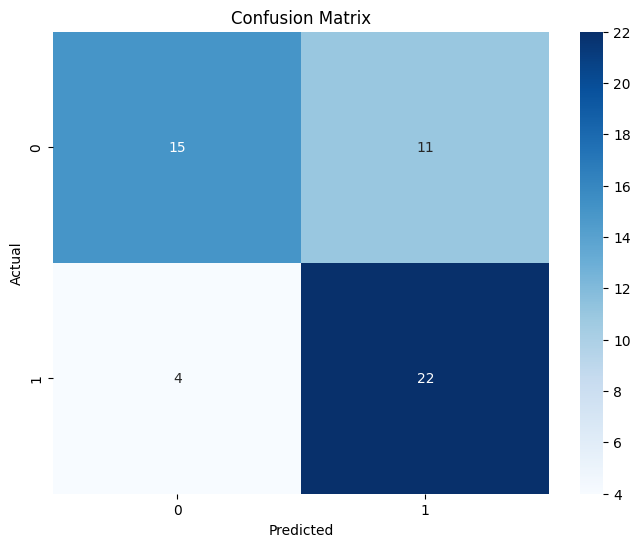

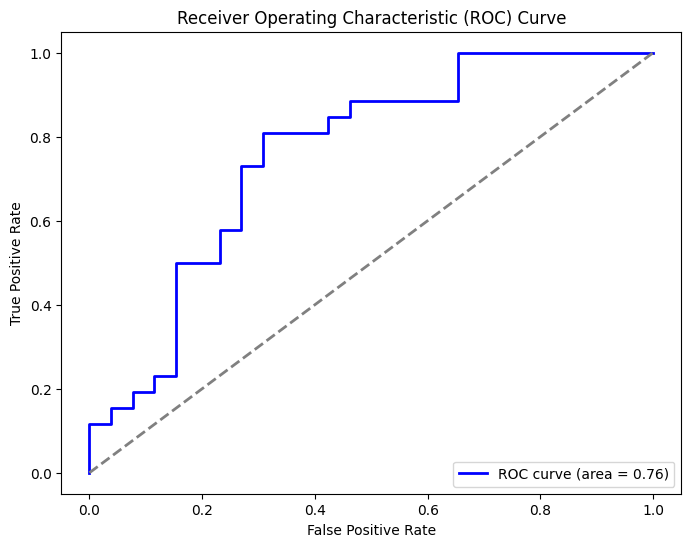

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, recall_score, f1_score, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mock dataset
np.random.seed(42)
date_range = pd.date_range(start='2022-01-01', end='2023-01-01', freq='B')  # Business days
data = {
    'Date': date_range,
    'Open': np.random.uniform(50, 150, len(date_range)),
    'High': np.random.uniform(50, 150, len(date_range)),
    'Low': np.random.uniform(50, 150, len(date_range)),
    'Close': np.random.uniform(50, 150, len(date_range)),
    'Volume': np.random.randint(1000, 5000, len(date_range))
}

# Ensure High >= Low and High, Low, Open, Close are logical
df = pd.DataFrame(data)
df['High'] = df[['Open', 'Close']].max(axis=1) + np.random.uniform(0, 10, len(df))
df['Low'] = df[['Open', 'Close']].min(axis=1) - np.random.uniform(0, 10, len(df))

# Save the mock dataset to a CSV file
df.to_csv('/content/KFC Dataset.csv', index=False)

# Load the dataset
data = pd.read_csv('/content/KFC Dataset.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data.sort_values('Date', inplace=True)

# Calculate the price change
data['Price_Change'] = data['Close'].diff()
data.dropna(inplace=True)

# Create target variable: Up (1) or Down (0)
data['Target'] = (data['Price_Change'] > 0).astype(int)

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
